<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-2-Applied-Modeling/blob/master/module4/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

In [4]:
# I will use the worlds_2019 dataset for now.
import pandas as pd

!git clone https://github.com/skredenmathias/DS-Unit-1-Build.git
path = '/content/DS-Unit-1-Build/'
worlds_2019 = pd.read_excel(path+'2019-summer-match-data-OraclesElixir-2019-11-10.xlsx')
(print(worlds_2019.shape))
worlds_2019.head()

Cloning into 'DS-Unit-1-Build'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.
(1428, 98)


,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,...,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,...,23.779817,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,...,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,...,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,...,23.779817,0,1,2694,101.532663,0.07255,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


Choose your target. Which column in your tabular dataset will you predict?

In [0]:
df = worlds_2019
target = df['result']
# Initially I seek if I can predict if a team will win or lose.
# The goal is to see how much variance is explained by each factor.
# / see how much certain factors contribute to the result.

In [0]:
# From here I might look at questions such as:

# How do win conditions change per patch?

# What are the win percentages for red / blue side? Are different objectives
# more important to one side?

# See how different positions have different degrees of impact based on teams.

# 

Is your problem regression or classification?

In [0]:
# Classification.

 How is your target distributed?
Classification: How many classes? Are the classes imbalanced?

In [8]:
target.value_counts(normalize=True)

1    0.5
0    0.5
Name: result, dtype: float64

 Choose your evaluation metric(s).

Classification: Is your majority class frequency >= 50% and < 70% ? 
If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. 

What evaluation metric will you choose, in addition to or instead of accuracy?

In [0]:
# Accuracy. What others could I choose?

 Choose which observations you will use to train, validate, and test your model.

Are some observations outliers? Will you exclude them?

Will you do a random split or a time-based split?

In [0]:
# Depends on ceteris paribus, other things equal:
# I might have to keep it on the same patch.
# Feature importances will differ across regions & tournaments & patches.
# Gamelength might be a leak?

# Should I also make a separate df with all 5 players grouped as a team w/
# most of the stats retained?

# Outliers:
# Gamelength beyond 50 minutes. I can filter these out if needed.

# Leaks / uninteresting columns:
# gameid, url, (league), (split), date, week, game, (patchno), playerid, 
# (position), (team), gamelength?, total gold?, firsttothreetowers?,
# teamtowerkills?, opptowerkills?, 

In [11]:
df.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,...,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,...,23.779817,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,...,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,...,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,...,23.779817,0,1,2694,101.532663,0.07255,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [12]:
df.columns

Index(['gameid', 'url', 'league', 'split', 'date', 'week', 'game', 'patchno',
       'playerid', 'side', 'position', 'player', 'team', 'champion', 'ban1',
       'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'k', 'd', 'a',
       'teamkills', 'teamdeaths', 'doubles', 'triples', 'quadras', 'pentas',
       'fb', 'fbassist', 'fbvictim', 'fbtime', 'kpm', 'okpm', 'ckpm', 'fd',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elementals',
       'oppelementals', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'oppelders', 'herald', 'heraldtime', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'dmgshare',
       'earnedgoldshare', 'wards', 'wpm', 'wardshare', 'wardkills', 'wcpm',
       'visionwards', 'visionwardbuys', 'visiblewardclearrate',
       'invisiblewardclearrate', 'totalgold', 'earnedg

 Begin to clean and explore your data.

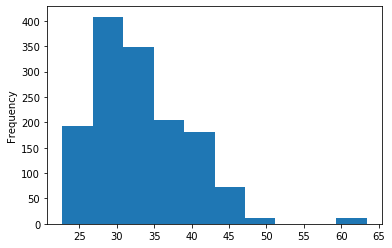

In [13]:
# Lot's of cleaning done in the unit 1 build notebook.
# Will focus on exploration here for now.

df['gamelength'].plot.hist() # We see a small outlier here.

In [14]:
df['gamelength'].describe()

count    1428.000000
mean       33.292857
std         6.435920
min        22.716667
25%        28.483333
50%        32.083333
75%        37.583333
max        63.416667
Name: gamelength, dtype: float64

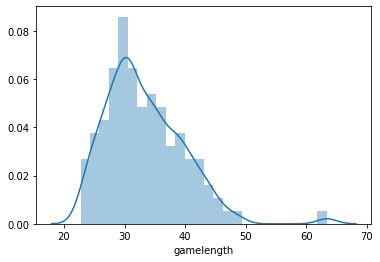

In [15]:
import seaborn as sns
# Note: Will be other outliers in the big dataset.
# Couldn't upload full dataset to Git, 80mb is too big.
# Why is it so big, it's just a text file?
sns.distplot(df['gamelength']);

# Fast first model

In [0]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=.25)

In [17]:
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 102kB 6.0MB/s 


In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [0]:
target = 'result'

In [0]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
# X_test = test.drop(columns=target)
# y_test = test[target]

In [21]:
X_train.shape, X_val.shape

((1071, 97), (357, 97))

In [22]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['url', 'league', 'split', 'week', 'game',
                                      'side', 'position', 'player', 'team',
                                      'champion', 'ban1', 'ban2', 'ban3',
                                      'ban4', 'ban5', 'doubles', 'triples',
                                      'quadras', 'pentas', 'dmgshare',
                                      'earnedgoldshare', 'visiblewardclearrate',
                                      'invisiblewardclearrate'],
                                drop_invariant=False, handle_missing='value',
                                handl...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf

In [23]:
# Get validation accuracy
y_pred = pipeline.predict(X_val)
print('Validation Accuracy:', pipeline.score(X_val, y_val)) # We've got leakage!

Validation Accuracy: 1.0


In [24]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (1071, 97)
X_train shape after encoding (1071, 97)


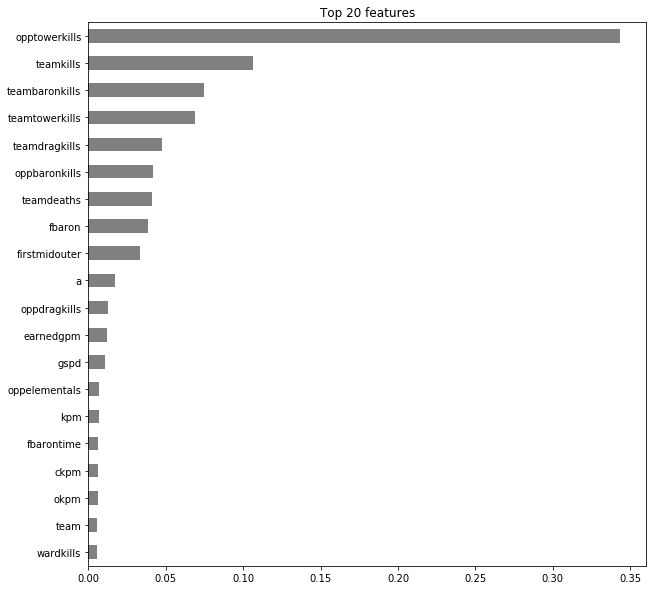

In [25]:
# Plot feature importances to find leak
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

# XGBoost

In [26]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['url', 'league', 'split', 'week', 'game',
                                      'side', 'position', 'player', 'team',
                                      'champion', 'ban1', 'ban2', 'ban3',
                                      'ban4', 'ban5', 'doubles', 'triples',
                                      'quadras', 'pentas', 'dmgshare',
                                      'earnedgoldshare', 'visiblewardclearrate',
                                      'invisiblewardclearrate'],
                                drop_invariant=False, handle_missing='value',
                                handl...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                       

In [27]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 1.0


# Partial dependence plots

In [0]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi] = 72

In [38]:
!pip install pdpbox
!pip install shap
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'teamtowerkills'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    num_grid_points=50
)

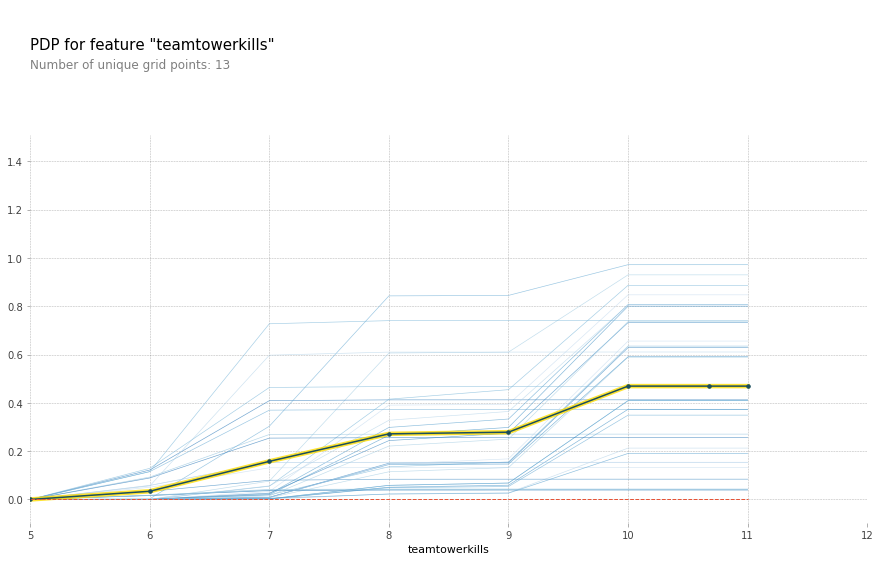

In [43]:
pdp_plot(isolated, feature_name=feature, plot_lines=True,
         frac_to_plot=0.1) # leakage
plt.xlim(5, 12);

# Permutation importances

In [46]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 9.9MB/s 


Using TensorFlow backend.


In [47]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=10,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [49]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

gameid            0.000000
visionwardbuys    0.000000
visionwards       0.000000
wcpm              0.000000
wardkills         0.000000
                    ...   
triples           0.000000
ckpm              0.000000
csdat15           0.000000
teamtowerkills    0.010924
opptowerkills     0.037815
Length: 97, dtype: float64

In [50]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0378 ± 0.0190,opptowerkills
0.0109 ± 0.0068,teamtowerkills
0 ± 0.0000,csdat15
0 ± 0.0000,ckpm
0 ± 0.0000,triples
0 ± 0.0000,quadras
0 ± 0.0000,pentas
0 ± 0.0000,fb
0 ± 0.0000,fbassist
0 ± 0.0000,fbvictim


# Dropping 'teamtowerkills' & 'opptowerkills'

In [0]:
def wrangle(X):
  X = X.copy()

  # Drop teamtowerkills & opptowerkills
  model_breakers = ['teamtowerkills','opptowerkills']
  X = X.drop(columns = model_breakers)
  return X

# train = wrangle(train)
val = wrangle(val)

In [52]:
val.columns

Index(['gameid', 'url', 'league', 'split', 'date', 'week', 'game', 'patchno',
       'playerid', 'side', 'position', 'player', 'team', 'champion', 'ban1',
       'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'k', 'd', 'a',
       'teamkills', 'teamdeaths', 'doubles', 'triples', 'quadras', 'pentas',
       'fb', 'fbassist', 'fbvictim', 'fbtime', 'kpm', 'okpm', 'ckpm', 'fd',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elementals',
       'oppelementals', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'oppelders', 'herald', 'heraldtime', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'fbaron', 'fbarontime',
       'teambaronkills', 'oppbaronkills', 'dmgtochamps',
       'dmgtochampsperminute', 'dmgshare', 'earnedgoldshare', 'wards', 'wpm',
       'wardshare', 'wardkills', 'wcpm', 'visionwards', 'visionwardbuys',
       'visiblewardclearrate', 'invisiblewardclearrate', 'totalgold',
       'earnedgpm', 'goldspent', 'gspd', 'minionki

In [53]:
train.shape, val.shape

((1071, 98), (357, 96))

# Running XGBoost again

In [0]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [55]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['url', 'league', 'split', 'week', 'game',
                                      'side', 'position', 'player', 'team',
                                      'champion', 'ban1', 'ban2', 'ban3',
                                      'ban4', 'ban5', 'doubles', 'triples',
                                      'quadras', 'pentas', 'dmgshare',
                                      'earnedgoldshare', 'visiblewardclearrate',
                                      'invisiblewardclearrate'],
                                drop_invariant=False, handle_missing='value',
                                handl...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                       

In [56]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

ValueError: ignored

# Feature importances, again

In [0]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

In [0]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=10,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [0]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

# Dropping a fuckton of columns, then repeat

In [0]:
# Leaks / uninteresting columns:
# gameid, url, (league), (split), date, week, game, (patchno), playerid, 
# (position), (team), gamelength?, total gold?, firsttothreetowers?,
# teamtowerkills?, opptowerkills?, 

In [0]:
def wrangle2(X):
  X = X.copy()

  # Drops
  low_importance = ['gameid', 'url', 'league', 'split', 'date', 'week',
                    'patchno', 'position', 'gamelength']
  X = X.drop(columns = low_importance)
  return X

# train = wrangle(train)
train = wrangle2(train)
val = wrangle2(val)

In [0]:
train.columns

In [0]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

# Feature importances, iterations

In [0]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

In [0]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=10,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [0]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

# Shapley plot

In [0]:
row = X_val.iloc[[0]]

In [58]:
y_val.iloc[[0]]

549    1
Name: result, dtype: int64

In [61]:
row #model.predict(row)

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
549,1061031,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43750.419722,G,1,9.19,10,Red,Support,CoreJJ,Team Liquid,Galio,Pantheon,Renekton,Heimerdinger,Lee Sin,Kayle,31.083333,0,2,11,15,9,0,0,0,0,0,1,0,9.379617,0.0,0.0,0.772118,0,6.867683,3,1,...,23.275017,1,0,6438,207.120643,0.103221,0.0910854,39,1.254692,0.33913,14,0.450402,9,11,,,7453,108.508311,6625,0.074364,57,0,0,0,1.83378,2202,2056,146,3169,3111,58,2793,2659,134,17,16,1,21,25,-4


In [60]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features=row
)

ValueError: ignored

# Using importances for feature selection

In [0]:
X_train.shape

In [0]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance